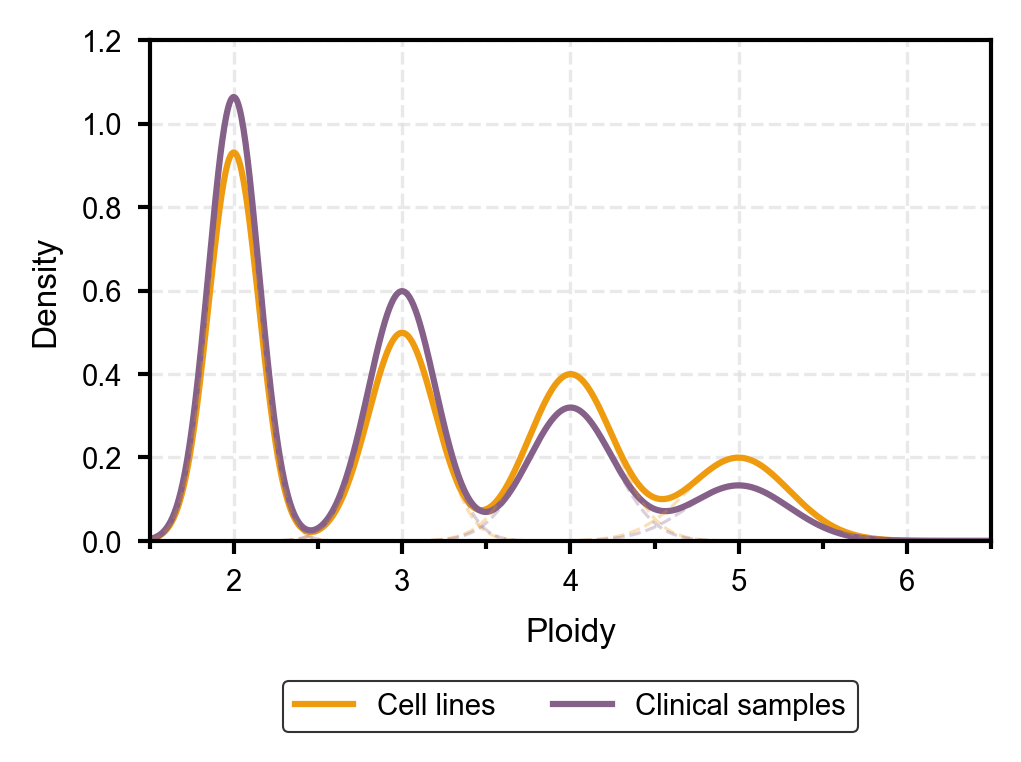

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator

def create_publication_plot(save_path=None):
    # Set the style for publication
    plt.style.use('default')
    
    # Set font to Arial
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['axes.linewidth'] = 1.0  # Set axis line width
    
    # Parameters for both distributions
    mus = np.array([2.0, 3.0, 4.0, 5.0])
    sigmas = np.array([0.15, 0.2, 0.25, 0.3])
    
    # Weights for each distribution
    cell_line_weights = np.array([0.35, 0.25, 0.25, 0.15])
    clinical_weights = np.array([0.4, 0.3, 0.2, 0.1])
    
    # Generate x values for plotting
    x = np.linspace(1.5, 7.5, 1000)
    
    # Calculate mixture distributions
    def mixture_pdf(x, weights, mus, sigmas):
        pdf = np.zeros_like(x)
        for w, mu, sigma in zip(weights, mus, sigmas):
            pdf += w * norm.pdf(x, mu, sigma)
        return pdf
    
    # Calculate PDFs
    cell_line_pdf = mixture_pdf(x, cell_line_weights, mus, sigmas)
    clinical_pdf = mixture_pdf(x, clinical_weights, mus, sigmas)
    
    # Create figure with the right size for a paper column
    # 89 mm is a common journal column width
    mm = 1/25.4  # conversion factor from mm to inches
    fig = plt.figure(figsize=(89*mm, 70*mm), dpi=300)
    ax = fig.add_subplot(111)
    
    # Plot the distributions with publication-quality colors
    ax.plot(x, cell_line_pdf, label='Cell lines', color='#EF9B0F', linewidth=1.5)
    ax.plot(x, clinical_pdf, label='Clinical samples', color='#856088', linewidth=1.5)
    
    # Plot components with lighter colors
    for i, (mu, sigma) in enumerate(zip(mus, sigmas)):
        # Cell line components
        component = cell_line_weights[i] * norm.pdf(x, mu, sigma)
        ax.plot(x, component, '--', color='#EF9B0F', alpha=0.3, linewidth=0.75)
        
        # Clinical components
        component = clinical_weights[i] * norm.pdf(x, mu, sigma)
        ax.plot(x, component, '--', color='#856088', alpha=0.3, linewidth=0.75)
    
    # Customize the plot for publication
    ax.set_xlabel('Ploidy', fontsize=8, labelpad=5)
    ax.set_ylabel('Density', fontsize=8, labelpad=5)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=7, length=3, width=1)
    ax.tick_params(axis='both', which='minor', labelsize=7, length=2, width=1)
    
    # Add minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))
    
    # Set axis limits
    ax.set_xlim(1.5, 6.5)
    ax.set_ylim(0, 1.2)
    
    # Add grid with light grey color
    ax.grid(True, which='major', linestyle='--', color='#E0E0E0', alpha=0.7)
    
    # Add legend
    legend = ax.legend(fontsize=7, frameon=True, edgecolor='black',
                      bbox_to_anchor=(0.5, -0.25), loc='upper center', 
                      ncol=2)  # Two columns for compact layout
    legend.get_frame().set_linewidth(0.5)
    
    # Add panel label
    # ax.text(-0.2, 1.05, 'a', transform=ax.transAxes, fontsize=10, 
    #         fontweight='bold', va='top')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure if path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
        plt.savefig(save_path.replace('.pdf', '.png'), format='png', dpi=300, bbox_inches='tight')
    
    return fig, ax

# Create the plot
fig, ax = create_publication_plot('/Users/lucreziavaleriani/Documents/GitHub/utils_locate/plots/ploidy.pdf')
plt.show()


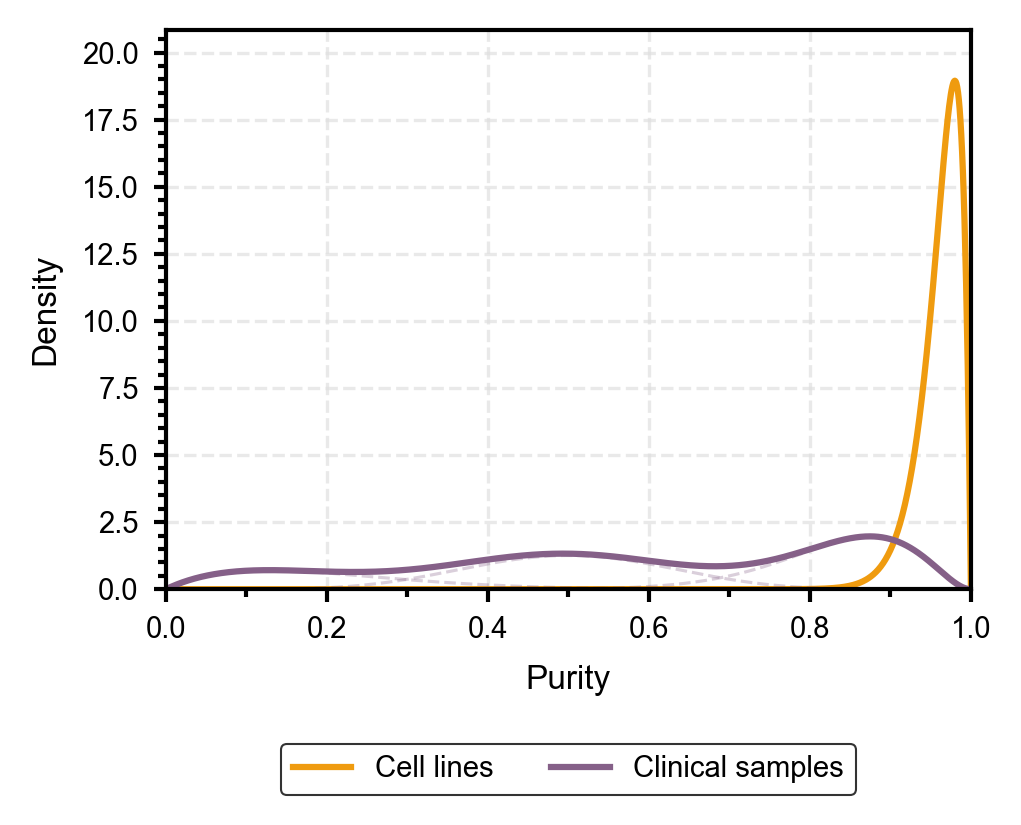

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.ticker import MultipleLocator

def create_purity_publication_plot(save_path=None):
    # Set the style for publication
    plt.style.use('default')
    
    # Set font to Arial
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['axes.linewidth'] = 1.0
    
    # Parameters
    x = np.linspace(0, 1, 1000)
    
    # Cell line parameters (single beta)
    cell_alpha = 50.0
    cell_beta = 2.0
    
    # Clinical parameters (mixture of betas)
    clinical_weights = np.array([0.4, 0.4, 0.2])
    clinical_alphas = np.array([15.0, 8.0, 2.0])
    clinical_betas = np.array([3.0, 8.0, 8.0])
    
    # Calculate distributions
    cell_line_dist = beta.pdf(x, cell_alpha, cell_beta)
    
    # Calculate clinical mixture
    clinical_dist = np.zeros_like(x)
    for w, a, b in zip(clinical_weights, clinical_alphas, clinical_betas):
        clinical_dist += w * beta.pdf(x, a, b)
    
    # Create figure
    mm = 1/25.4  # conversion factor from mm to inches
    fig = plt.figure(figsize=(89*mm, 75*mm), dpi=300)
    ax = fig.add_subplot(111)
    
    # Plot distributions
    ax.plot(x, cell_line_dist, label='Cell lines', color='#EF9B0F', linewidth=1.5)
    ax.plot(x, clinical_dist, label='Clinical samples', color='#856088', linewidth=1.5)
    
    # Plot individual components for clinical
    for w, a, b in zip(clinical_weights, clinical_alphas, clinical_betas):
        component = w * beta.pdf(x, a, b)
        ax.plot(x, component, '--', color='#856088', alpha=0.3, linewidth=0.75)
    
    # Customize the plot
    ax.set_xlabel('Purity', fontsize=8, labelpad=5)
    ax.set_ylabel('Density', fontsize=8, labelpad=5)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=7, length=3, width=1)
    ax.tick_params(axis='both', which='minor', labelsize=7, length=2, width=1)
    
    # Add minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    
    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(np.max(cell_line_dist), np.max(clinical_dist)) * 1.1)
    
    # Add grid
    ax.grid(True, which='major', linestyle='--', color='#E0E0E0', alpha=0.7)
    
    # Add legend at the bottom
    legend = ax.legend(fontsize=7, frameon=True, edgecolor='black',
                      bbox_to_anchor=(0.5, -0.25), loc='upper center',
                      ncol=2)
    legend.get_frame().set_linewidth(0.5)
    
    # Add panel label
    # ax.text(-0.2, 1.05, 'b', transform=ax.transAxes, fontsize=10,
    #         fontweight='bold', va='top')
    
    # Add annotations for the clinical components
    clinical_labels = ['High purity', 'Medium purity', 'Low purity']
    y_pos = ax.get_ylim()[1] * 0.95
    spacing = ax.get_ylim()[1] * 0.1
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the figure if path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
        plt.savefig(save_path.replace('.pdf', '.png'), format='png', dpi=300, bbox_inches='tight')
    
    return fig, ax

# Create the plot
fig, ax = create_purity_publication_plot('/Users/lucreziavaleriani/Documents/GitHub/utils_locate/plots/purity.pdf')
plt.show()